<a href="https://colab.research.google.com/github/Haritha-datascientist/WalmartSalesPrediction/blob/main/walmart_insights_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#read the dataset
#df = pd.read_csv("Walmart (1).csv",skiprows=1, names=['Store','Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'])
df=pd.read_csv("Walmart (1).csv")
df=df[df["Holiday_Flag"]!="Holiday_Flag"]
df.shape

(12873, 8)

In [3]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
4,1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106


In [4]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,12873,12870,12870,12870,12870,12870,12870,12870
unique,48,143,6435,2,3528,892,2145,349
top,1,05-02-2010,1643690.9,0,50.43,3.638,130.5502069,8.099
freq,286,90,2,11970,22,78,22,156


In [5]:
df.Store.value_counts()

1                                                   286
35                                                  286
26                                                  286
27                                                  286
28                                                  286
29                                                  286
30                                                  286
31                                                  286
32                                                  286
33                                                  286
34                                                  286
36                                                  286
24                                                  286
37                                                  286
38                                                  286
39                                                  286
40                                                  286
41                                              

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 0 to 12873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         12873 non-null  object
 1   Date          12870 non-null  object
 2   Weekly_Sales  12870 non-null  object
 3   Holiday_Flag  12870 non-null  object
 4   Temperature   12870 non-null  object
 5   Fuel_Price    12870 non-null  object
 6   CPI           12870 non-null  object
 7   Unemployment  12870 non-null  object
dtypes: object(8)
memory usage: 905.1+ KB


In [7]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
# CHECK THE MISSING VALUES
df.isnull().sum()

Store           0
Date            3
Weekly_Sales    3
Holiday_Flag    3
Temperature     3
Fuel_Price      3
CPI             3
Unemployment    3
dtype: int64

In [9]:
#drop duplicate values
df=df.dropna()
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
#duplicate values
df.duplicated().sum()

6435

In [11]:
#drop duplicates
df=df.drop_duplicates()
#check duplicates removed
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         6435 non-null   object
 1   Date          6435 non-null   object
 2   Weekly_Sales  6435 non-null   object
 3   Holiday_Flag  6435 non-null   object
 4   Temperature   6435 non-null   object
 5   Fuel_Price    6435 non-null   object
 6   CPI           6435 non-null   object
 7   Unemployment  6435 non-null   object
dtypes: object(8)
memory usage: 452.5+ KB


In [13]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [14]:
df['Store']=df['Store'].astype('int')
df['Holiday_Flag']=df['Holiday_Flag'].astype('int')
df['Date']=df['Date'].astype('datetime64')
df['Weekly_Sales']=df['Weekly_Sales'].astype('float')
df['Temperature']=df['Temperature'].astype('float')
df['Fuel_Price']=df['Fuel_Price'].astype('float')
df['CPI']=df['CPI'].astype('float')
df['Unemployment']=df['Unemployment'].astype('float')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB


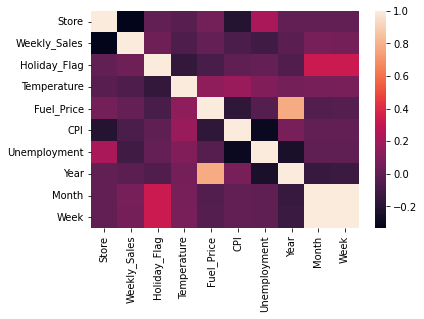

In [22]:
# visualize correlation matrix in Seaborn using a heatmap
import seaborn as sns
sns.heatmap(df.corr())

In [17]:
#Splitting Date Column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [18]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


#Data Visualizations

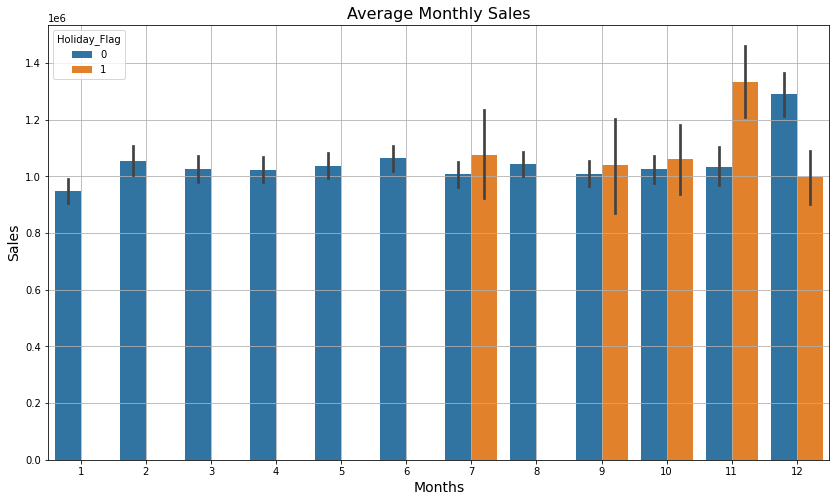

In [21]:
#Average Monthly Sales with holiday flag 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',hue="Holiday_Flag",data=df)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
#plt.savefig('plots/avg_monthly_sales.png')
plt.grid()

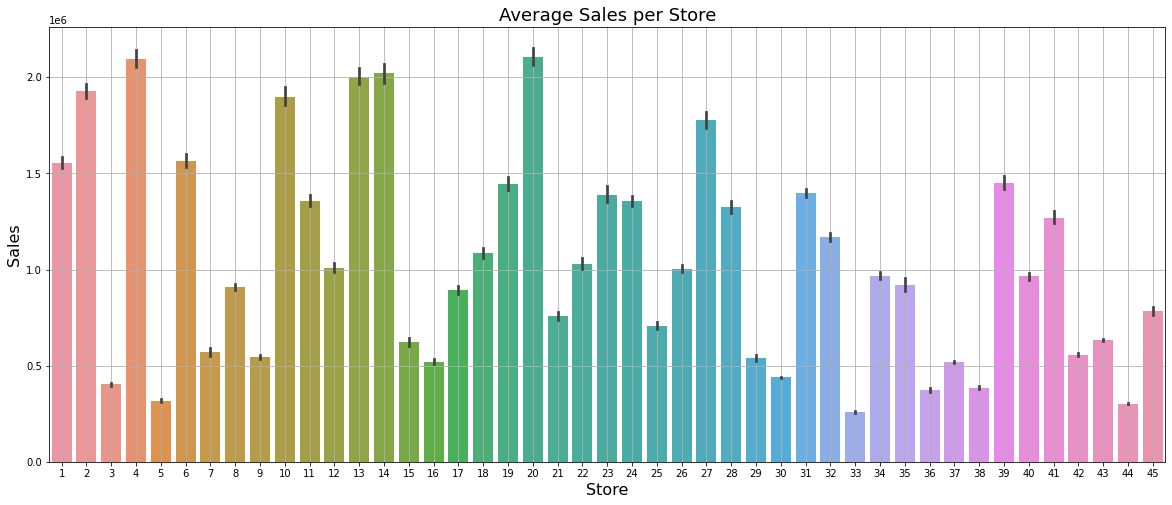

In [20]:
#Average Weekly Sales Store wise

plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
#plt.savefig('plots/avg_sales_store.png')
plt.show()